# Môi trường triển khai

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
! pip install ucimlrepo

In [ ]:
!pip install pandas pyfim==6.28

In [ ]:
! pip install pip==21.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.2.1
    Uninstalling pip-22.2.1:
      Successfully uninstalled pip-22.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pip-tools 6.13.0 requires pip>=22.2, but you have pip 21.3.1 which is incompatible.


In [ ]:
! pip install pyarc

  Using cached pyarc-1.1.4-py2.py3-none-any.whl (36 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  Preparing metadata (setup.py) ... error
  Preparing metadata (setup.py) ... error
  Preparing metadata (setup.py) ... error
  Preparing metadata (setup.py) ... error
  Preparing metadata (setup.py) ... error
  Preparing metadata (setup.py) ... error
  Preparing metadata (setup.py) ... error
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1303 sha256=2a2fd273170c69455c7083205d31715e5ccccb3cc8a7f9b01164eb33f130a45d
  Stored in directory: /root/.cache/pip/wheels/9b/13/01/6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn


In [ ]:
# Thư viện
# Data
import pandas                     as pd
import numpy                      as np
import re
import itertools
from itertools import combinations, product

# Biểu đồ
import matplotlib.patches as patches
import matplotlib.pyplot          as plt
import seaborn                    as sns
from scipy.stats                  import norm

# Tiền xử lý
from sklearn.preprocessing        import LabelEncoder, MinMaxScaler
from imblearn.over_sampling       import SMOTE # Xử lý mất cân bằng dữ liệu
from imblearn.under_sampling      import RandomUnderSampler

# Mô hình
from sklearn.model_selection      import train_test_split
from pyarc                        import CBA, TransactionDB
from pyarc.algorithms             import generateCARs, top_rules, createCARs, M1Algorithm, M2Algorithm
from sklearn.tree                 import DecisionTreeClassifier, export_graphviz
import pydotplus                  as pdp
from IPython.display              import Image

# Đánh giá
from sklearn                      import metrics
from sklearn.metrics              import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, auc, roc_curve
from sklearn.model_selection      import cross_val_score
import time

# Loải bỏ cảnh báo
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

---
# Tiền xử lý dữ liệu
---

*   Đối với dữ liệu phân loại, ánh xạ đến các số nguyên dương liên tiếp
*   Đối với dữ liệu số thì rời rạc hóa rồi ánh xạ đến các số nguyên dương liên tiếp


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Tài liệu học tập/HK5/Máy học/Machine Learning/Data/bank.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Mô tả

**Các biến đầu vào:**
* Dữ liệu khách hàng của ngân hàng:
    1. age (số) -> rời rạc hóa
    2. job : loại công việc (phân loại: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
    3. marital : tình trạng hôn nhân (phân loại: "married","divorced","single"; lưu ý: “divorced” có nghĩa là ly hôn hoặc góa)
    4. education (phân loại: "unknown","secondary","primary","tertiary")
    5. default: có tín dụng mặc định không? (nhị phân: "yes","no")
    6. balance: số dư trung bình hàng năm, tính bằng euro (số)
    7. housing: có vay mua nhà không? (nhị phân: "yes","no")
    8. loan: cá nhân có vay không? (nhị phân: "yes","no")
* Liên quan đến liên hệ cuối cùng của chiến dịch hiện tại:
    9. contact: loại liên lạc liên lạc (phân loại: "unknown", "telephone", "cellular")
    10. day: ngày liên lạc cuối cùng trong tháng (số)
    11. month: tháng liên hệ cuối cùng trong năm (phân loại: "jan", "feb", "mar", ..., "nov", "dec")
    12. duration: thời lượng liên lạc lần cuối, tính bằng giây (số)
* Thuộc tính khác:
    13. campaign: số lượng liên hệ được thực hiện trong chiến dịch này và cho khách hàng này (số, bao gồm liên hệ cuối cùng)
    14. pdays: số ngày trôi qua sau khi khách hàng được liên hệ lần cuối từ chiến dịch trước đó (số -1 có nghĩa là khách hàng chưa được liên hệ trước đó)
    15. previous: số lượng liên hệ được thực hiện trước chiến dịch này và cho khách hàng này (số)
    16. poutcome: kết quả của chiến dịch tiếp thị trước đó (phân loại: "không xác định", "khác", "thất bại", "thành công")

* Biến đầu ra (Biến mục tiêu - Targe):
    17. y - khách hàng đã đăng ký gửi tiền có kỳ hạn chưa? (nhị phân: "yes","no")

In [ ]:
# In ra các cột của bộ dữ liệu
print("Bộ dữ liệu bao gồm các cột:", df.columns)

Bộ dữ liệu bao gồm các cột: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Xem mô tả của cột số
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
# Xem mô tả của cột phân loại
df.describe(include='O')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [ ]:
# Xem số lượng danh mục mỗi cột
print("Số lượng giá trị của mỗi cột")
df.nunique()

Số lượng giá trị của mỗi cột


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [ ]:
df_num = df.select_dtypes(include=[int , float])
df_cate = df.select_dtypes(include=[object])

print("Biến numerical:\n" + '\n'.join(df_num.columns[1:]))
print("\nBiến categorical:\n" + '\n'.join(df_cate.columns[1:]))

Biến numerical:
balance
day
duration
campaign
pdays
previous

Biến categorical:
marital
education
default
housing
loan
contact
month
poutcome
deposit


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
columns = df.columns.values
for col in columns:
    print(f"{col} \n{20 * '-'}")
    print(df[col].value_counts(), '\n')

age 
--------------------
31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64 

job 
--------------------
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64 

marital 
--------------------
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64 

education 
--------------------
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64 

default 
--------------------
no     10994
yes      168
Name: default, dtype: int64 

balance 
--------------------
 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


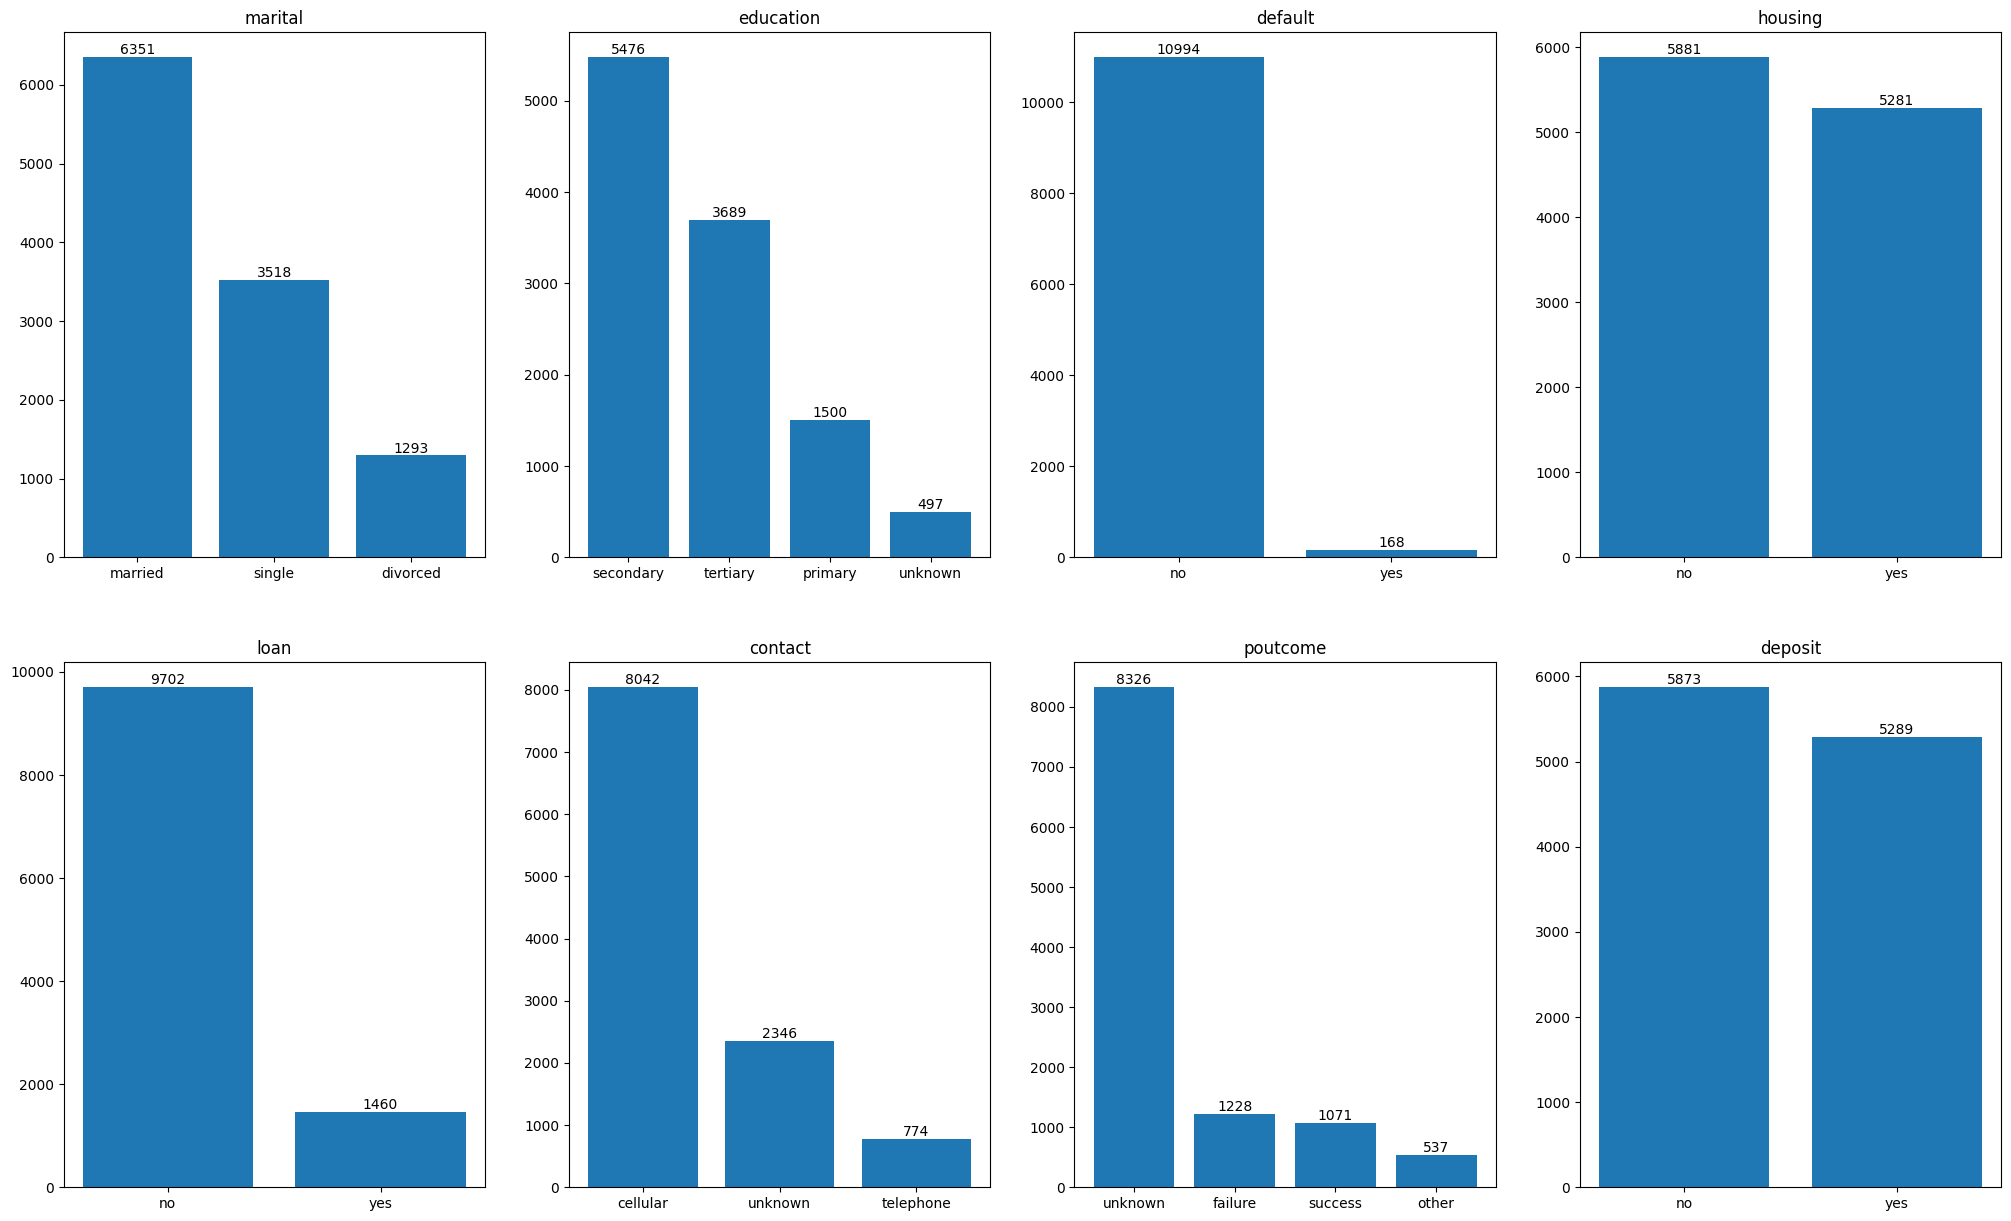

In [ ]:
cat_col_less = [col for col in df_cate if df[col].nunique() <= 5]

plt.figure(figsize=([25, 15]))
for i in range(len(cat_col_less)):
    counts = df[cat_col_less[i]].value_counts()
    plt.subplot(2, 4, (i+1))
    plt.title(cat_col_less[i])
    bars = plt.bar(counts.index, counts.values)

    # Thêm thông số số lượng dữ liệu trên mỗi cột
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


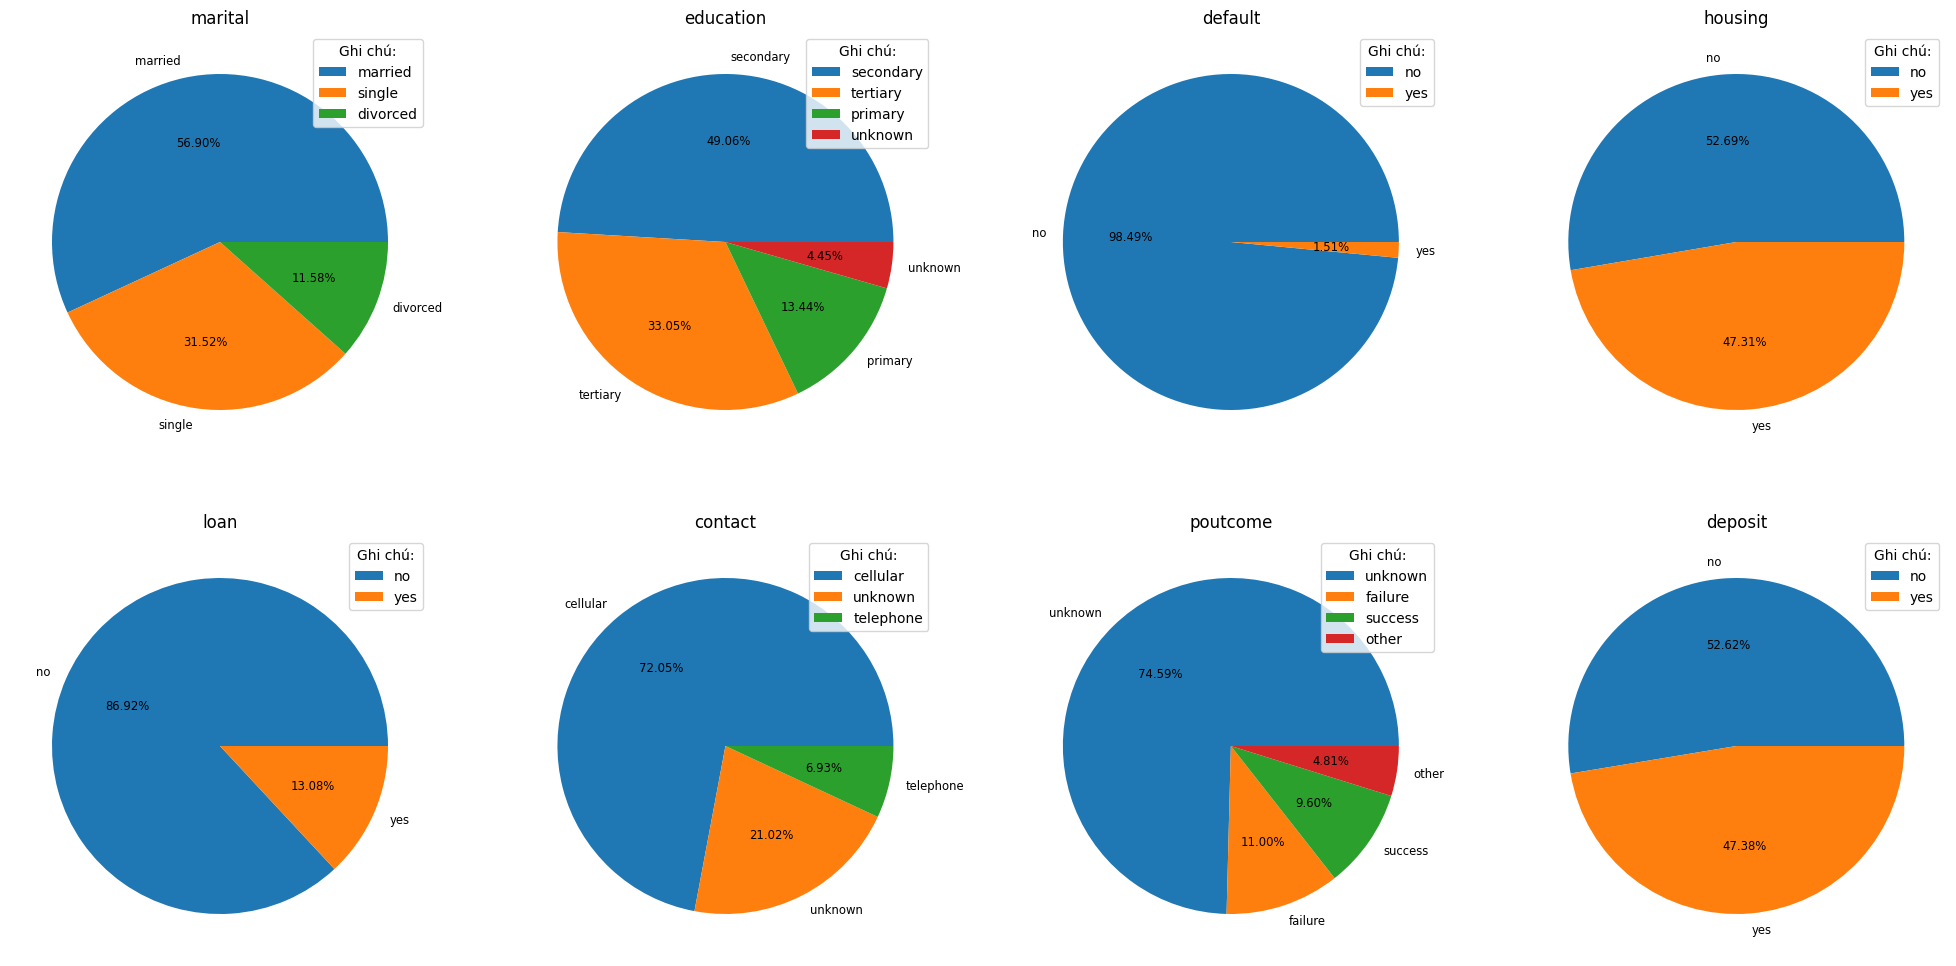

In [ ]:
plt.figure(figsize = ([25, 12])) # khung (width, height): inch
for i in range(len(cat_col_less)):
    counts = df[cat_col_less[i]].value_counts()
    plt.subplot(2, 4, (i+1)) # subplot 1 trong ma trận (2 rows, 3 cols)
    plt.title(cat_col_less[i])
    plt.pie(counts.values, labels = counts.index, autopct = '%.2f%%', textprops={'size': 'smaller'})
    plt.legend(title = 'Ghi chú:', loc = 1)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


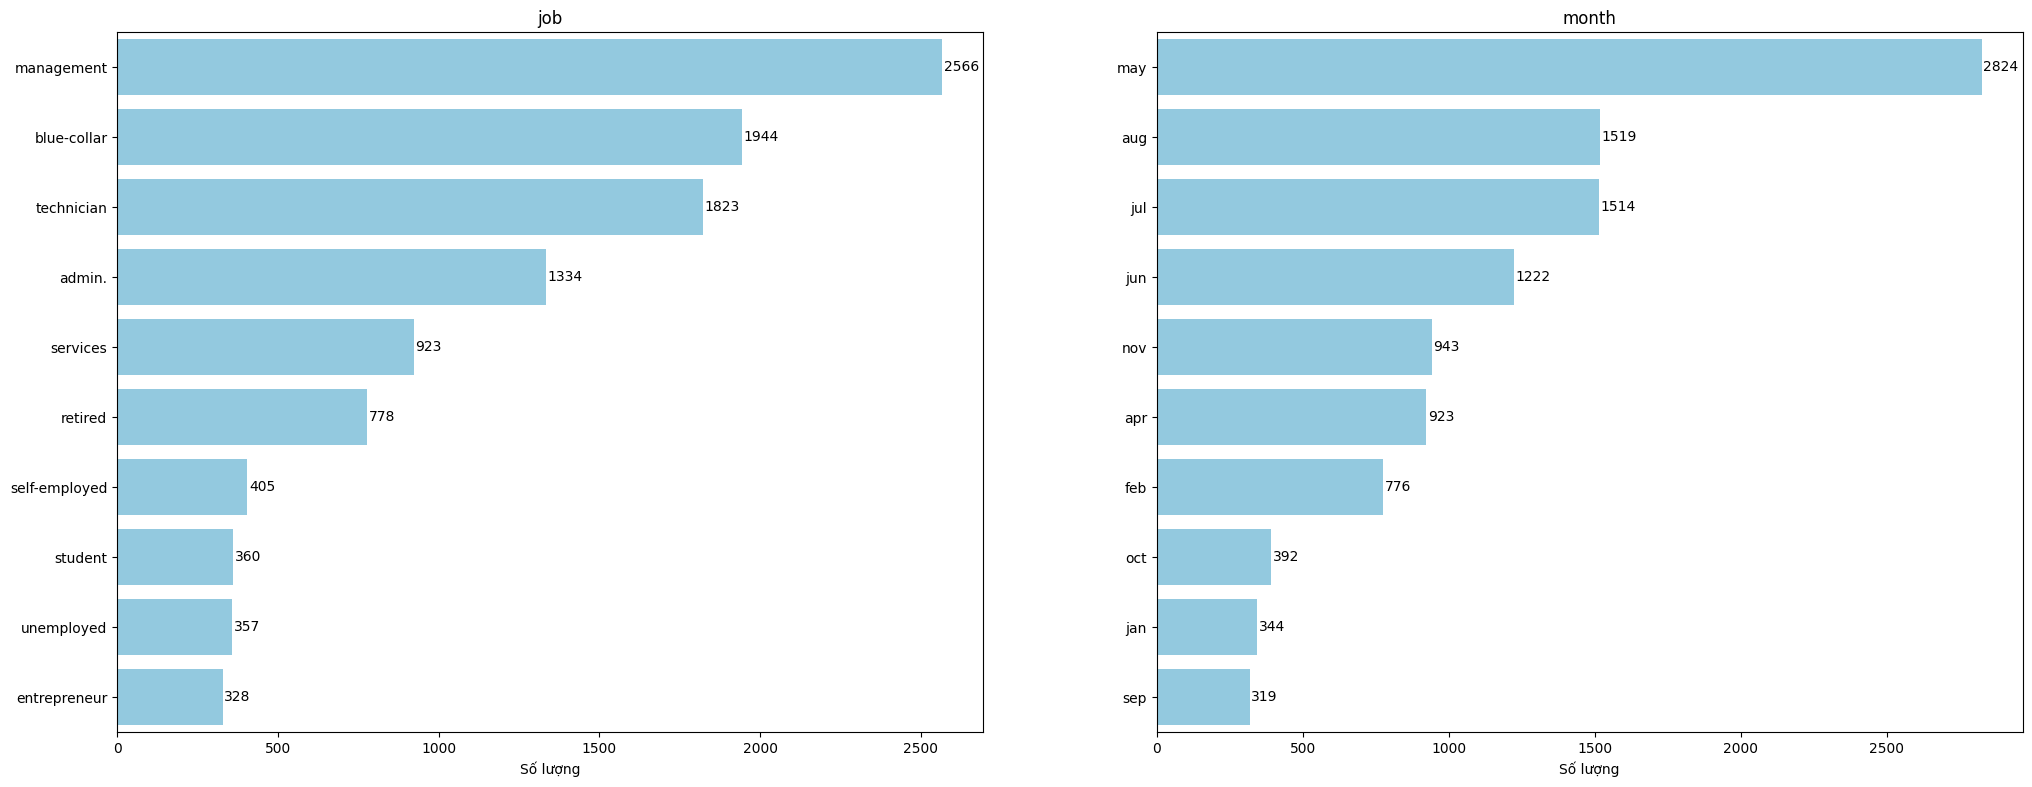

In [ ]:
cat_col_much = [col for col in df_cate if df[col].nunique() > 5]

plt.figure(figsize=(38, 20))
for i in range(len(cat_col_much)):
  plt.subplot(2, 3, (i+1))
  top10 = df[cat_col_much[i]].value_counts()[:10]
  ax = sns.barplot(x=top10.values, y=top10.index,color='skyblue')
  ax.set_xlabel('Số lượng')
  ax.set_title(cat_col_much[i])
  for j, v in enumerate(top10.values):
    ax.annotate(str(v), xy=(v+5,j), va='center')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


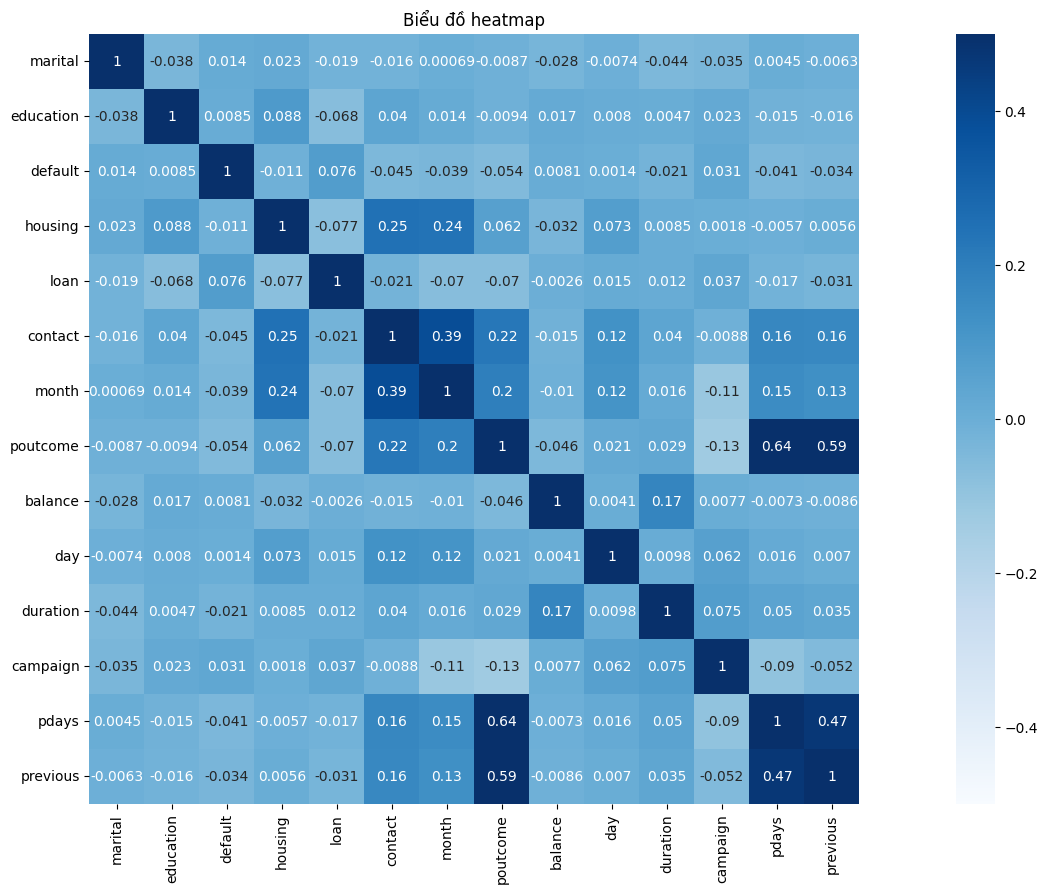

In [ ]:
vars = ['marital',
        'education',
        'default',
        'housing',
        'loan',
        'contact',
        'month',
        'poutcome',
        'balance',
        'day',
        'duration',
        'campaign',
        'pdays',
        'previous']

corr_matrix = df[vars].apply(lambda x: pd.factorize(x)[0]).corr()

plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', square=True,
vmin=-0.5, vmax=0.5)

plt.title('Biểu đồ heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


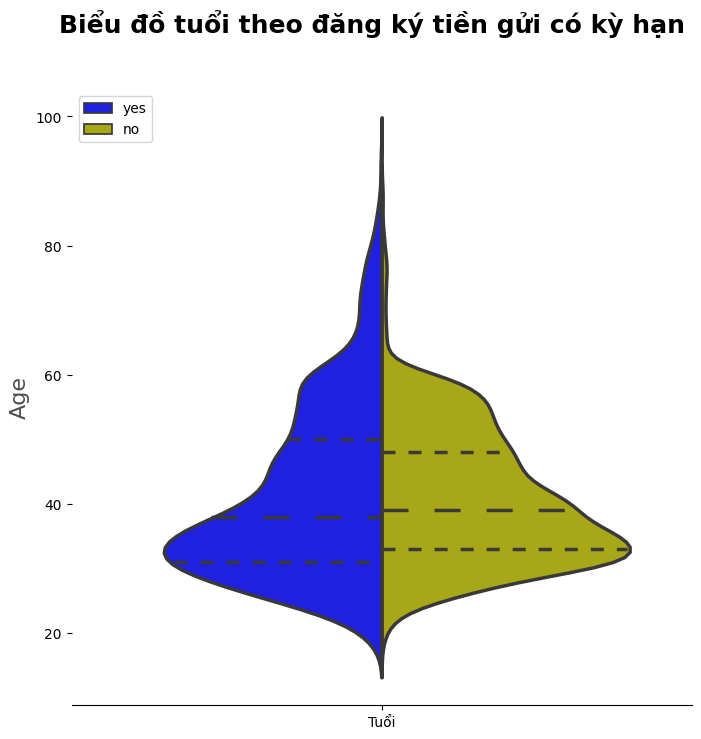

In [ ]:
# Vẽ biểu đồ violin theo cột target
# Tạo DataFrame phụ để đếm số lượng theo từng nhóm
df['age_column'] = 'Tuổi'

f, ax = plt.subplots(figsize=(8, 8))

sns.violinplot(x="age_column", y="age", hue="deposit", data=df, split=True, linewidth=2.5,
               inner="quart", palette={"yes": "b", "no": "y"})
sns.despine(left=True)

f.suptitle('Biểu đồ tuổi theo đăng ký tiền gửi có kỳ hạn', fontsize=18, fontweight='bold', fontname = 'Open Sans')
ax.set_xlabel("",size = 16,alpha=0.7)
ax.set_ylabel("Age",size = 16,alpha=0.7)
plt.legend(loc='upper left')

df.drop(df[['age_column']],axis=1, inplace = True)

## Làm sạch dữ liệu

### Dữ liệu bị thiếu

In [ ]:
## Đếm số dòng chứa NA (None, NaN) của mỗi cột
print('*** Số lượng giá trị bị thiếu của các cột:')
print(len(df) - df.count())

*** Số lượng giá trị bị thiếu của các cột:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Những giá trị bị thiếu được gán bằng nhãn "unknown".
def unknown_ratio(column):
    return column.apply(lambda x: x == "unknown").sum()
df.apply(unknown_ratio)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

In [ ]:
# Xem những cột bị thiếu trên 80% dữ liệu
threshold = 0.7 * df.shape[0]
df.columns[df.apply(unknown_ratio) > threshold]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['poutcome'], dtype='object')

In [ ]:
# Xóa những cột bị thiếu trên 80% dữ liệu
df.drop(df.columns[df.apply(unknown_ratio) > threshold], axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Xóa đi những dòng có trên 3 giá trị bị thiếu
unknown_counts = df.apply(unknown_ratio)
df.drop(df[df.apply(lambda row: unknown_ratio(row) >= 3, axis=1)].index, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Dữ liệu bị nhiễu

In [ ]:
# Kiểm tra outliers
numerical = df.select_dtypes(include=['number'])
numerical_columns = numerical.columns
scaler = MinMaxScaler()
scaler.fit(numerical)
numerical = scaler.transform(numerical)
numerical = pd.DataFrame(numerical, columns = numerical_columns)
numerical.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,balance,day,duration,campaign,pdays,previous
0,0.532468,0.104371,0.133333,0.268110,0.000000,0.0,0.0
1,0.493506,0.078273,0.133333,0.377675,0.000000,0.0,0.0
2,0.298701,0.092185,0.133333,0.357566,0.000000,0.0,0.0
3,0.480519,0.105882,0.133333,0.148750,0.000000,0.0,0.0
4,0.467532,0.079851,0.133333,0.172983,0.016129,0.0,0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


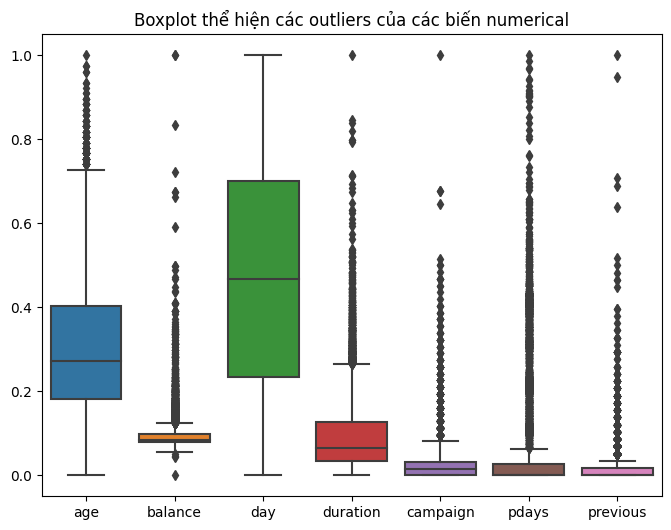

In [ ]:
plt.subplots(figsize = (8,6))
sns.boxplot(numerical)
plt.title("Boxplot thể hiện các outliers của các biến numerical")
plt.show()

#### Cột balance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


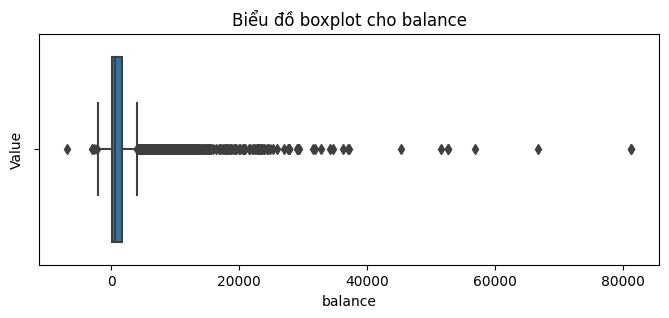

In [ ]:
box = 'balance'
plt.subplots(figsize = (8,3))
plt.title(f'Biểu đồ boxplot cho {box}')
plt.xlabel(box)
sns.boxplot(x=box, data=df)
plt.ylabel('Value')
plt.show()

In [ ]:
Q1 = df[box].quantile(0.25)
Q3 = df[box].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier = df[(df[box] < lower_bound) | (df[box] > upper_bound)]
print(f'Giá trị ngoại lai chiếm {round(outlier.shape[0]/df.shape[0]*100,2)}% bộ dữ liệu')

Giá trị ngoại lai chiếm 9.46% bộ dữ liệu


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Đếm số lượng mỗi giá trị trong cột 'deposit' cho cả df và outlier
df_counts = df['deposit'].value_counts()
outlier_counts = outlier['deposit'].value_counts()
# Tính phần trăm cho mỗi giá trị của cột 'deposit' trong outlier so với bộ dữ liệu
percentage_outlier = round((outlier_counts / df_counts) * 100,2)
percentage_outlier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


no      7.69
yes    11.42
Name: deposit, dtype: float64

In [ ]:
lower_bound

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-2255.875

Vì có nhiều giá trị ngoại lai nên không thể xử lý bằng cách loại bỏ outliers. Xóa bỏ đi giá trị quá lớn và giá trị quá nhỏ.
Cụ thể là xóa bỏ đi những giá trị lớn hơn 40000, và nhỏ hơn lower_bound vì những giá trị này chiếm chưa tới 0.5% bộ dữ liệu



In [ ]:
# Đếm số lần xuất hiện của giá trị lớn hơn 40000 trong cột "balance"
balance_greater_than_40000 = (df['balance'] > 40000)
print(f"Số lần xuất hiện của giá trị lớn hơn 40000 trong cột 'balance': {balance_greater_than_40000.sum()}")
df[balance_greater_than_40000]['deposit'].value_counts()

Số lần xuất hiện của giá trị lớn hơn 40000 trong cột 'balance': 8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


yes    5
no     3
Name: deposit, dtype: int64

In [ ]:
# Đếm số lần xuất hiện của giá trị nhỏ hơn lower_bound trong cột "balance"
balance_less_than_lower_bound = (df['balance'] < lower_bound)
print(f"Số lần xuất hiện của giá trị nhỏ hơn đáy giới hạn trong cột 'balance': {balance_less_than_lower_bound.sum()}")
df[balance_less_than_lower_bound]['deposit'].value_counts()

Số lần xuất hiện của giá trị nhỏ hơn đáy giới hạn trong cột 'balance': 4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


no     3
yes    1
Name: deposit, dtype: int64

In [ ]:
# Bỏ đi những giá trị nhỏ nhỏ hơn lower_bound và giá trị lớn hơn 40000.
df.drop(df[balance_greater_than_40000 | balance_less_than_lower_bound].index, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Cột duration

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


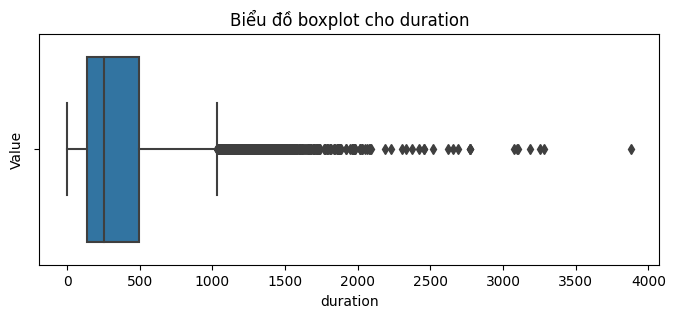

In [ ]:
box = 'duration'
plt.subplots(figsize = (8,3))
plt.title(f'Biểu đồ boxplot cho {box}')
plt.xlabel(box)
sns.boxplot(x=box, data=df)
plt.ylabel('Value')
plt.show()

In [ ]:
Q1 = df[box].quantile(0.25)
Q3 = df[box].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier = df[(df[box] < lower_bound) | (df[box] > upper_bound)]
print(f'Giá trị ngoại lai chiếm {round(outlier.shape[0]/df.shape[0]*100,2)}% bộ dữ liệu')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Giá trị ngoại lai chiếm 5.7% bộ dữ liệu


In [ ]:
# Đếm số lượng mỗi giá trị trong cột 'deposit' cho cả df và outlier
df_counts = df['deposit'].value_counts()
outlier_counts = outlier['deposit'].value_counts()
# Tính phần trăm cho mỗi giá trị của cột 'deposit' trong outlier so với bộ dữ liệu
percentage_outlier = round((outlier_counts / df_counts) * 100,2)
percentage_outlier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


no      1.09
yes    10.81
Name: deposit, dtype: float64

Tỷ lệ những cuộc gọi càng dài thì chiếm phần tỷ lệ trăm đồng ý ký gửi kỳ hạn cao hơn, nhưng mình tập trung vào tệp khách hàng đăng ký gửi kỳ hạn nên những giá trị outliers này có giá trị phân tích nên sẽ giữ lại. Chỉ bỏ đi những cuộc gọi quá dài trên 45 phút.

In [ ]:
# Đếm số cuộc gọi trên 60 phút
duration_greater_than_60m = (df['duration'] > 60*60)
print(f"Số cuộc gọi trên 60 phút: {duration_greater_than_60m.sum()}")
df[duration_greater_than_60m]['deposit'].value_counts()

Số cuộc gọi trên 60 phút: 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


yes    1
Name: deposit, dtype: int64

In [ ]:
# Bỏ đi một cuộc gọi trên 1 tiếng
df.drop(df[duration_greater_than_60m].index, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Cột campaign

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


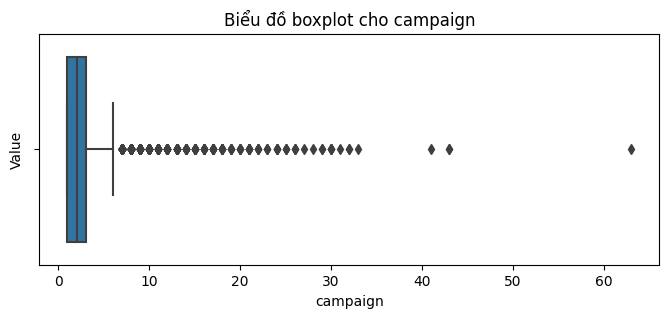

In [ ]:
box = 'campaign'
plt.subplots(figsize = (8,3))
plt.title(f'Biểu đồ boxplot cho {box}')
plt.xlabel(box)
sns.boxplot(x=box, data=df)
plt.ylabel('Value')
plt.show()

In [ ]:
Q1 = df[box].quantile(0.25)
Q3 = df[box].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier = df[(df[box] < lower_bound) | (df[box] > upper_bound)]
print(f'Giá trị ngoại lai chiếm {round(outlier.shape[0]/df.shape[0]*100,2)}% bộ dữ liệu')

Giá trị ngoại lai chiếm 5.38% bộ dữ liệu


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Đếm số lượng mỗi giá trị trong cột 'deposit' cho cả df và outlier
df_counts = df['deposit'].value_counts()
outlier_counts = outlier['deposit'].value_counts()
# Tính phần trăm cho mỗi giá trị của cột 'deposit' trong outlier so với bộ dữ liệu
percentage_outlier = round((outlier_counts / df_counts) * 100,2)
percentage_outlier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


no     7.49
yes    3.05
Name: deposit, dtype: float64

In [ ]:
# Đếm số khách hàng được liên hệ trên 25 lần
campaign_greater_than_25 = (df['campaign'] >= 25)
print(f"Số khách hàng được liên hệ trên 30 lần: {campaign_greater_than_25.sum()}")
df[campaign_greater_than_25]['deposit'].value_counts()

Số khách hàng được liên hệ trên 30 lần: 22


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


no     20
yes     2
Name: deposit, dtype: int64

In [ ]:
# Bỏ đi những khách hàng được liên hệ trên 30 lần
df.drop(df[campaign_greater_than_25].index, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Cột pdays

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


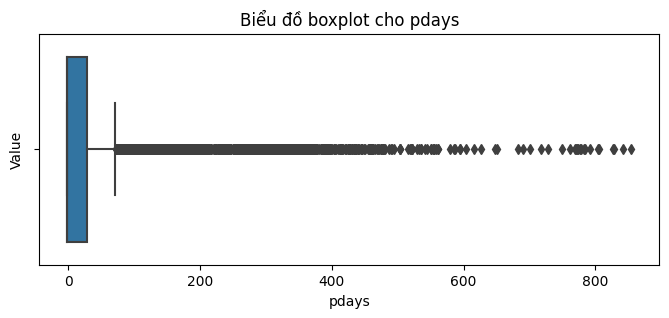

In [ ]:
box = 'pdays'
plt.subplots(figsize = (8,3))
plt.title(f'Biểu đồ boxplot cho {box}')
plt.xlabel(box)
sns.boxplot(x=box, data=df)
plt.ylabel('Value')
plt.show()

In [ ]:
Q1 = df[box].quantile(0.25)
Q3 = df[box].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier = df[(df[box] < lower_bound) | (df[box] > upper_bound)]
print(f'Giá trị ngoại lai chiếm {round(outlier.shape[0]/df.shape[0]*100,2)}% bộ dữ liệu')

Giá trị ngoại lai chiếm 24.29% bộ dữ liệu


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Đếm số lượng mỗi giá trị trong cột 'deposit' cho cả df và outlier
df_counts = df['deposit'].value_counts()
outlier_counts = outlier['deposit'].value_counts()
# Tính phần trăm cho mỗi giá trị của cột 'deposit' trong outlier so với bộ dữ liệu
percentage_outlier = round((outlier_counts / df_counts) * 100,2)
percentage_outlier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


no     15.20
yes    34.34
Name: deposit, dtype: float64

In [ ]:
# Đếm số khách hàng chưa liên hệ trên 2 năm
pdays_greater_than_2years = (df['pdays'] > 2*365)
print(f"Số khách hàng chưa liên hệ trên 2 năm: {pdays_greater_than_2years.sum()}")
df[pdays_greater_than_2years]['deposit'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Số khách hàng chưa liên hệ trên 2 năm: 17


yes    12
no      5
Name: deposit, dtype: int64

In [ ]:
# Bỏ đi những khách hàng chưa liên hệ trên 2 năm vì thông tin đã cũ.
df.drop(df[pdays_greater_than_2years].index, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Cột previous

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


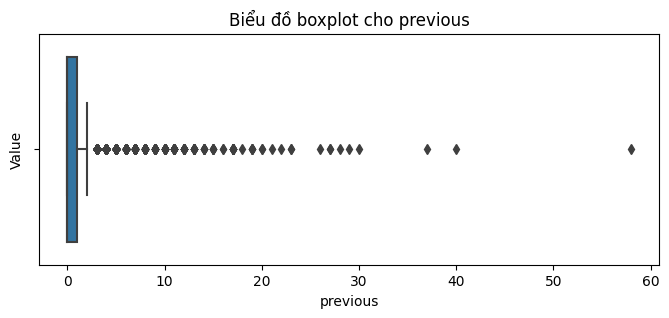

In [ ]:
box = 'previous'
plt.subplots(figsize = (8,3))
plt.title(f'Biểu đồ boxplot cho {box}')
plt.xlabel(box)
sns.boxplot(x=box, data=df)
plt.ylabel('Value')
plt.show()

In [ ]:
Q1 = df[box].quantile(0.25)
Q3 = df[box].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier = df[(df[box] < lower_bound) | (df[box] > upper_bound)]
print(f'Giá trị ngoại lai chiếm {round(outlier.shape[0]/df.shape[0]*100,2)}% bộ dữ liệu')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Giá trị ngoại lai chiếm 11.27% bộ dữ liệu


In [ ]:
# Đếm số lượng mỗi giá trị trong cột 'deposit' cho cả df và outlier
df_counts = df['deposit'].value_counts()
outlier_counts = outlier['deposit'].value_counts()
# Tính phần trăm cho mỗi giá trị của cột 'deposit' trong outlier so với bộ dữ liệu
percentage_outlier = round((outlier_counts / df_counts) * 100,2)
percentage_outlier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


no      6.66
yes    16.37
Name: deposit, dtype: float64

In [ ]:
# Đếm số khách hàng được liên hệ trước chiến dịch này trên 30 lần
previous_greater_than_30 = (df['previous'] > 30)
print(f"Số khách hàng được liên hệ trước chiến dịch này trên 30 lần: {previous_greater_than_30.sum()}")
df[previous_greater_than_30]['deposit'].value_counts()

Số khách hàng được liên hệ trước chiến dịch này trên 30 lần: 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


no     2
yes    1
Name: deposit, dtype: int64

In [ ]:
# Bỏ đi những khách hàng được liên hệ trước chiến dịch này trên 30 lần
df.drop(df[previous_greater_than_30].index, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Thu gọn dữ liệu

In [ ]:
# Bỏ cột day, month vì không có thông tin về năm về thông tin về ngày tháng không có giá trị
df.drop(df[['day','month']],axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Chuyển dạng dữ liệu

#### Cột age

* 18-27: Độ tuổi thanh niên, bắt đầu phát triển sự nghiệp, tài chính chưa mạnh.
* 28-44: Độ tuổi lập gia đình và bắt đầu sinh con cái, con cái phụ thuộc. Nền tảng tài chính chưa mạnh, chưa có nhiều tích lũy.
* 45-64: Con cái đã lớn, bắt đầu bước sang tuổi trưởng thành, nền tảng tài chính ổn đinh, có tích lũy.
* 65-84: Độ tuổi bắt đầu về hưu. Con cái đã trưởng thành và lập gia đình, không có người phụ thuộc.
* 85+: Giai đoạn của người cao niên, có thể mắc các bệnh và không có khả năng tạo ra thu nhập.


In [ ]:
# Rời rạc dữ liệu cột age
# Định nghĩa các khoảng (bins) cho rời rạc
bins = [18, 28, 45, 65, 85, 100]  # Ví dụ: rời rạc thành các khoảng 0-18, 19-25, 26-35, và 36 trở lên

# Đặt nhãn cho các khoảng
labels = ['18_27', '28_44', '45_64', '65_84', '85_100']

# Sử dụng phương thức cut để rời rạc cột "Age"
df['age_bins'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['age_bins'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


28_44     6315
45_64     3436
18_27      927
65_84      399
85_100      24
Name: age_bins, dtype: int64

#### Cột balance

In [ ]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bins = [-float('inf'), 0, round(Q3), round(upper_bound), 10000, 20000, float('inf')]

# Đặt nhãn cho từng khoảng giá trị
labels = ['debt', 'low', 'moderate', 'high', 'very_high', 'extremely_high']

# Sử dụng cut để thực hiện custom binning
df['balance_bins'] = pd.cut(df['balance'], bins=bins, labels=labels)

# Hiển thị DataFrame sau khi thực hiện rời rạc hóa
print(df[['balance', 'balance_bins']].head())

   balance balance_bins
0     2343     moderate
1       45          low
2     1270          low
3     2476     moderate
4      184          low


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['balance_bins'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


low               6875
moderate          1734
debt              1451
high               822
very_high          170
extremely_high      49
Name: balance_bins, dtype: int64

#### Cột duration

In [ ]:
bins = [0, 901, 1801, 2701, 3601]  # Biên cho các khoảng (tính theo giây)
labels = ['under_15m', '15_30m', '30_45m', '45_60m'] # Các khoảng theo phút
df['duration_bins'] = pd.cut(df['duration'], bins=bins, labels=labels, right=False)
# Hiển thị DataFrame sau khi thực hiện rời rạc hóa
print(df[['duration', 'duration_bins']].head())

   duration duration_bins
0      1042        15_30m
1      1467        15_30m
2      1389        15_30m
3       579     under_15m
4       673     under_15m


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['duration_bins'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


under_15m    10169
15_30m         873
30_45m          50
45_60m           9
Name: duration_bins, dtype: int64

#### Cột campaign

In [ ]:
# Rời rạc cột campaign theo nhóm 5
bins = list(range(df['campaign'].min(), (df['campaign'].max()+4), 5))
labels = [f"{i}_{i+4}" for i in range(df['campaign'].min(), df['campaign'].max(), 5)]
df['campaign_bins'] = pd.cut(df['campaign'], bins=bins, labels=labels, right=False)

# Hiển thị DataFrame sau khi rời rạc hóa
print(df[['campaign', 'campaign_bins']].head())

   campaign campaign_bins
0         1           1_5
1         1           1_5
2         1           1_5
3         1           1_5
4         2           1_5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['campaign_bins'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1_5      10260
6_10       653
11_15      127
16_20       41
21_25       20
Name: campaign_bins, dtype: int64

#### Cột pdays

In [ ]:
# Đổi -1 thành no và rời rạc hóa từ 1 ngày đến 3 tháng, 3 tháng - 6 tháng, 6 tháng - 1 năm và 1 năm - 2 năm
bins = [-1, 1, 91, 181, 366, 365*2+1]  # Biên cho các khoảng (tính theo ngày)
labels = ['no', 'under_3_months', '3_6months', '6months_1year', '1_2years']
df['pdays_bins'] = pd.cut(df['pdays'], bins=bins, labels=labels, right=False)

# Hiển thị DataFrame sau khi rời rạc hóa
print(df[['pdays', 'pdays_bins']].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   pdays pdays_bins
0     -1         no
1     -1         no
2     -1         no
3     -1         no
4     -1         no


In [ ]:
df['pdays_bins'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


no                8286
6months_1year     1303
3_6months          948
under_3_months     329
1_2years           235
Name: pdays_bins, dtype: int64

#### Cột previous

In [ ]:
# Binning cột previous (những vẫn giữ nguyên giá trị 0 vì bản chất là không liên lạc, rời rạc hóa từ 1 đến giá trị lớn nhất)
bins = [0, 1, 11, 21, 31]  # Biên cho các khoảng (tính theo ngày)
labels = ['no', '1_10', '11_20', '21_30']
df['previous_bins'] = pd.cut(df['previous'], bins=bins, labels=labels, right=False)

# Hiển thị DataFrame sau khi rời rạc hóa
print(df[['previous', 'previous_bins']].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   previous previous_bins
0         0            no
1         0            no
2         0            no
3         0            no
4         0            no


In [ ]:
df['previous_bins'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


no       8286
1_10     2725
11_20      80
21_30      10
Name: previous_bins, dtype: int64

## Dữ liệu sau khi tiền xử lý

In [ ]:
columns_cba = ['age_bins', 'job', 'marital', 'education', 'default', 'balance_bins', 'housing', 'loan', 'contact', 'duration_bins', 'campaign_bins', 'pdays_bins', 'previous_bins', 'deposit']
df_cba = df[columns_cba].reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Lấy danh sách tên cột có phần "_bins"
columns_with_bins = [col for col in df_cba.columns if '_bins' in col]

# Đổi tên cột và bỏ "_bins"
df_cba.rename(columns=lambda x: x.replace('_bins', ''), inplace=True)
df_cba

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,deposit
0,45_64,admin.,married,secondary,no,moderate,yes,no,unknown,15_30m,1_5,no,no,yes
1,45_64,admin.,married,secondary,no,low,no,no,unknown,15_30m,1_5,no,no,yes
2,28_44,technician,married,secondary,no,low,yes,no,unknown,15_30m,1_5,no,no,yes
3,45_64,services,married,secondary,no,moderate,yes,no,unknown,under_15m,1_5,no,no,yes
4,45_64,admin.,married,tertiary,no,low,no,no,unknown,under_15m,1_5,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11096,28_44,blue-collar,single,primary,no,low,yes,no,cellular,under_15m,1_5,no,no,no
11097,28_44,services,married,secondary,no,low,no,no,unknown,under_15m,1_5,no,no,no
11098,28_44,technician,single,secondary,no,low,no,no,cellular,under_15m,1_5,no,no,no
11099,28_44,technician,married,secondary,no,debt,no,yes,cellular,under_15m,1_5,3_6months,1_10,no


In [ ]:
# Xuất DataFrame ra file CSV
df_cba.to_csv('df_cba.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---
# Phân lớp bằng luật kết hợp
---

## Thuật toán CBA với thư viện pyARC

### Chia tập dữ liệu

In [ ]:
# Tạo tập huấn luyện và tập dữ liệu còn lại
data_train, data_test = train_test_split(df_cba, test_size=0.2, random_state=42)

data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_train['deposit'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


no     4679
yes    4201
Name: deposit, dtype: int64

In [ ]:
# Chuyển đổi dữ liệu
txns_train = TransactionDB.from_DataFrame(data_train)
txns_test = TransactionDB.from_DataFrame(data_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Grid Search

In [ ]:
# Các giá trị tham số bạn muốn thử nghiệm
algorithms = ["m1", "m2"]
confidences = [0.4, 0.5, 0.6]
supports = [0.05, 0.1, 0.3]

# Tạo DataFrame để lưu kết quả
results_df = pd.DataFrame(columns=["Algorithm", "Confidence", "Support", "Accuracy", "Precision", "Recall", "F1"])

# Duyệt qua tất cả các tổ hợp của các tham số
for algorithm, confidence, support in product(algorithms, confidences, supports):
    # Khởi tạo và huấn luyện mô hình với các tham số
    cba_model = CBA(algorithm=algorithm, confidence=confidence, support=support).fit(txns_train)

    # Dự đoán trên tập kiểm tra
    y_pred = cba_model.predict(txns_test)

    # Tính toán các độ đo
    accuracy = cba_model.rule_model_accuracy(txns_test)
    precision = precision_score(data_test["deposit"], y_pred,pos_label='yes')
    recall = recall_score(data_test["deposit"], y_pred, pos_label='yes')
    f1 = f1_score(data_test["deposit"], y_pred, pos_label='yes')

    # Thêm kết quả vào DataFrame
    results_df = results_df.append({
        "Algorithm": algorithm,
        "Confidence": confidence,
        "Support": support,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1
    }, ignore_index=True)

# In bảng kết quả
print(results_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Algorithm  Confidence  Support  Accuracy  Precision    Recall        F1
0         m1         0.4     0.05  0.705988   0.710071  0.655399  0.681641
1         m1         0.4     0.10  0.676722   0.657324  0.682629  0.669737
2         m1         0.4     0.30  0.661864   0.712737  0.493897  0.583472
3         m1         0.5     0.05  0.705988   0.710071  0.655399  0.681641
4         m1         0.5     0.10  0.676722   0.657324  0.682629  0.669737
5         m1         0.5     0.30  0.661864   0.712737  0.493897  0.583472
6         m1         0.6     0.05  0.705988   0.710071  0.655399  0.681641
7         m1         0.6     0.10  0.676722   0.657324  0.682629  0.669737
8         m1         0.6     0.30  0.661864   0.712737  0.493897  0.583472
9         m2         0.4     0.05  0.703287   0.753750  0.566197  0.646649
10        m2         0.4     0.10  0.656911   0.747145  0.430047  0.545888
11        m2         0.4     0.30  0.661864   0.712737  0.493897  0.583472
12        m2         0.5 

In [ ]:
#Sắp xếp (results_df) giảm dần theo cột f1
results_df.sort_values(['F1'], ascending=False, inplace=True)
results_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Algorithm,Confidence,Support,Accuracy,Precision,Recall,F1
0,m1,0.4,0.05,0.705988,0.710071,0.655399,0.681641
6,m1,0.6,0.05,0.705988,0.710071,0.655399,0.681641
3,m1,0.5,0.05,0.705988,0.710071,0.655399,0.681641
1,m1,0.4,0.10,0.676722,0.657324,0.682629,0.669737
4,m1,0.5,0.10,0.676722,0.657324,0.682629,0.669737
7,m1,0.6,0.10,0.676722,0.657324,0.682629,0.669737
9,m2,0.4,0.05,0.703287,0.753750,0.566197,0.646649
12,m2,0.5,0.05,0.702386,0.753769,0.563380,0.644815
15,m2,0.6,0.05,0.702386,0.753769,0.563380,0.644815
5,m1,0.5,0.30,0.661864,0.712737,0.493897,0.583472


### Xây dựng mô hình - Đánh giá kết quả

In [ ]:
algorithm = 'm1'
confidence = 0.4
support = 0.05


# Khởi tạo và huấn luyện lại mô hình với bộ tham số tốt nhất
cba = CBA(algorithm=algorithm, confidence=confidence, support=support)
cba_model = cba.fit(txns_train)
y_pred = cba_model.predict(txns_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Xem các luật kết hợp đã được học
# Truy cập danh sách các luật đã học được
rules = cba_model.clf.rules

# In ra nội dung của từng luật
for rule in rules:
    print(rule)

CAR {pdays=no,duration=15_30m} => {deposit=yes} sup: 0.06 conf: 0.90 len: 3, id: 77939
CAR {duration=15_30m} => {deposit=yes} sup: 0.07 conf: 0.90 len: 2, id: 77951
CAR {pdays=no,contact=unknown,duration=under_15m,marital=married,housing=yes} => {deposit=no} sup: 0.07 conf: 0.89 len: 6, id: 79066
CAR {contact=unknown,marital=married,duration=under_15m,housing=yes} => {deposit=no} sup: 0.07 conf: 0.88 len: 5, id: 79098
CAR {pdays=no,contact=unknown,education=secondary,duration=under_15m,marital=married} => {deposit=no} sup: 0.06 conf: 0.88 len: 6, id: 79274
CAR {pdays=no,contact=unknown,age=28_44,duration=under_15m,marital=married} => {deposit=no} sup: 0.06 conf: 0.88 len: 6, id: 79397
CAR {pdays=no,contact=unknown,marital=married,duration=under_15m} => {deposit=no} sup: 0.10 conf: 0.88 len: 5, id: 79620
CAR {pdays=no,contact=unknown,duration=under_15m,age=45_64} => {deposit=no} sup: 0.05 conf: 0.87 len: 5, id: 78888
CAR {pdays=no,contact=unknown,education=secondary,age=28_44,duration=u

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Trực quan hóa kết quả

In [ ]:
columns_vis = ['age', 'pdays','deposit']
data_train_, data_test_df = train_test_split(df, test_size=0.2, random_state=42)
df_undiscr = data_test_df[columns_vis].reset_index(drop=True)
df_discr = data_test[columns_vis].reset_index(drop=True)

x_bin = [18, 28, 45, 65, 85, 100]
y_bin = [-1, 1, 91, 181, 366, 365*2+1]


df_vals = df_undiscr.values
x_points = list(map(lambda n: n[0], df_vals))
y_points = list(map(lambda n: n[1], df_vals))

x = [18, 28, 45, 65, 85, 100]
y = [-1, 1, 91, 181, 366, 365*2+1]

data_class = list(df_undiscr['deposit'])
appearance = {
    'yes': ('green', "o"),
    'no': ('blue', "o")
}
rule_appearance = {
    'yes': 'lightgreen',
    'no': 'aqua',
}

plt.style.use('seaborn-white')
rules

len(x_points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-88-138fdb0a9b64>:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


2221

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


rule count 76


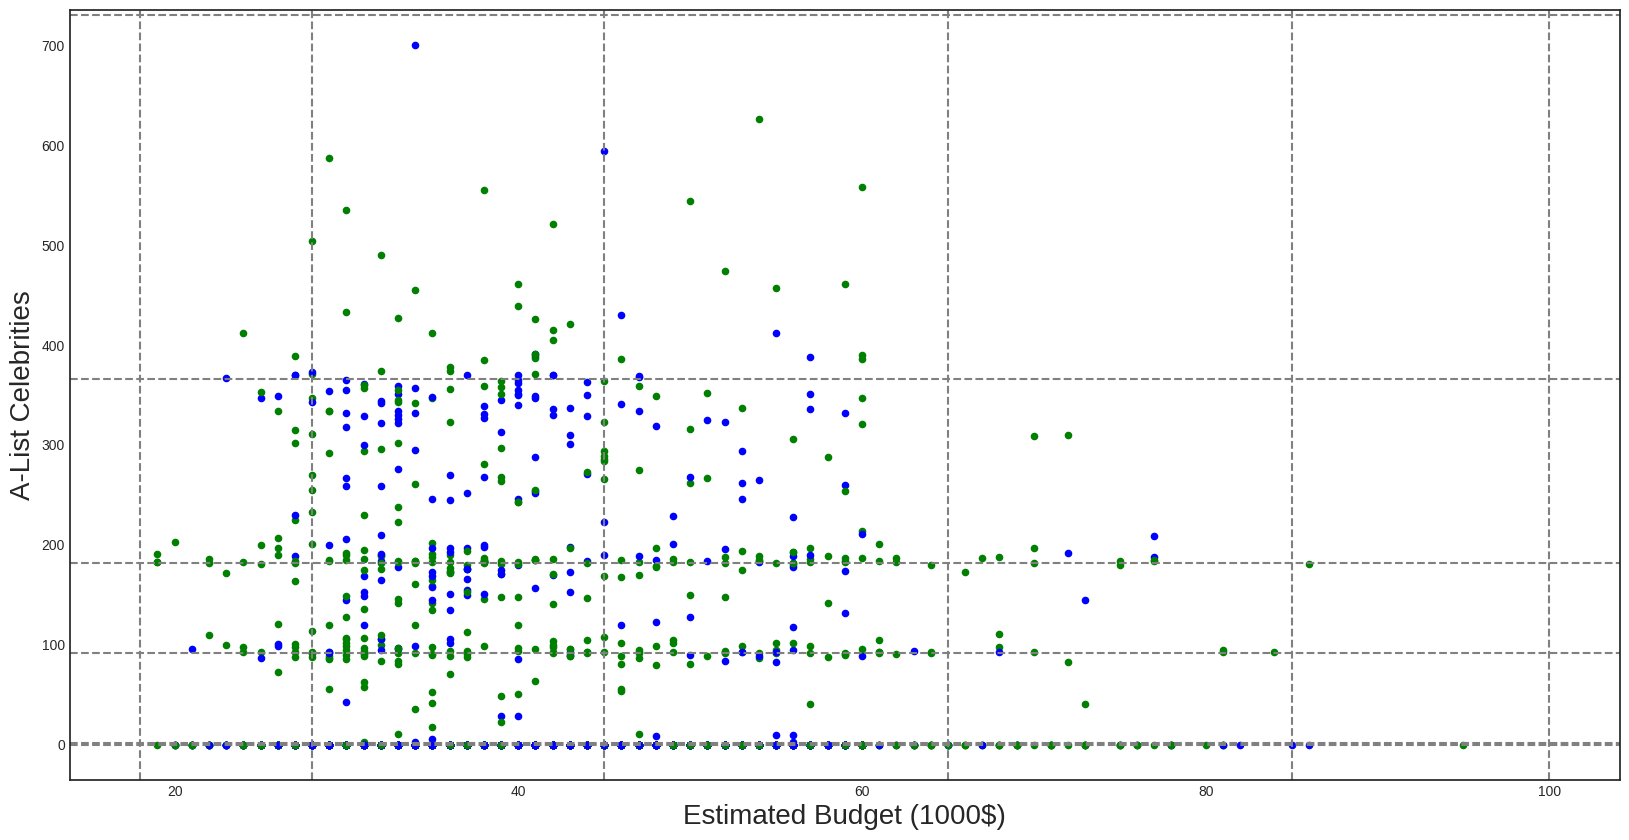

In [ ]:
plt.figure(figsize=(20, 10))

# data cases
for i in range(len(x_points)):
    plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=20)

# rule boundary lines
for i, n in enumerate(x):
    plt.axhline(y=y[i], color = "grey", linestyle="dashed")
    plt.axvline(x=x[i], color = "grey", linestyle="dashed")

plt.xlabel('Estimated Budget (1000$)', fontsize=20)
plt.ylabel('A-List Celebrities', fontsize=20)

print("rule count", len(rules))

#### Ma trận nhầm lẫn - Các chỉ số đánh giá

In [ ]:
def evaluate_classification(y_true, y_pred):

    # Tính các thước đo chính
    precision = precision_score(y_true, y_pred,pos_label='yes')
    recall = recall_score(y_true, y_pred, pos_label='yes')
    f1 = f1_score(y_true, y_pred, pos_label='yes')


    ## Hiển thị giá trị cá chỉ số
    print(f'Precision = {(precision * 100):.1f}%')
    print(f'Recall    = {(recall * 100):.1f}%')
    print(f'F1 Score  = {(f1 * 100):.1f}%')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


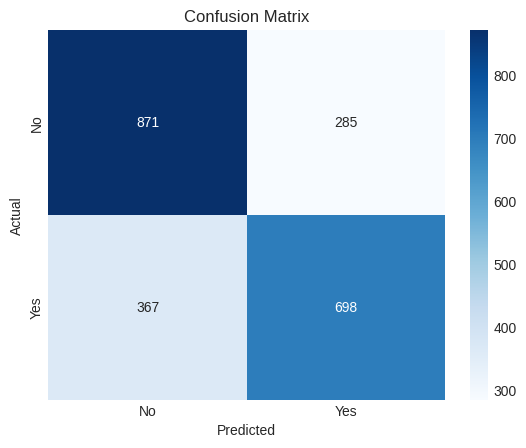

In [ ]:
# Tính confusion matrix
conf_matrix = confusion_matrix(data_test['deposit'], y_pred)

# Vẽ ma trận nhầm lẫn bằng seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Các chỉ số đánh giá
accuracy = cba_model.rule_model_accuracy(txns_test)
print(f'Accuracy = {(accuracy * 100):.1f}%')
evaluate_classification(data_test['deposit'], y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy = 70.6%
Precision = 71.0%
Recall    = 65.5%
F1 Score  = 68.2%


In [ ]:
# Chuyển các giá trị yes, no sang 1, 0
data_test['deposit_encoded'] = data_test['deposit'].map({'yes': 1, 'no': 0})
y_pred_encoded = [1 if value == 'yes' else 0 for value in y_pred]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


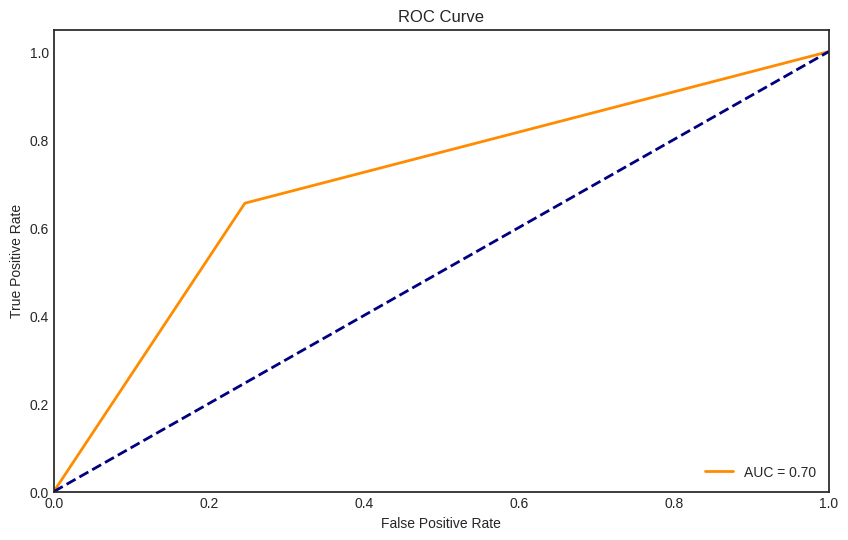

In [ ]:
## ROC và AUC: phân lớp NHỊ PHÂN

fpr, tpr, thresholds = roc_curve(data_test['deposit_encoded'], y_pred_encoded)
auc = metrics.auc(fpr, tpr) ## nếu gọi trực tiếp auc(fpr, tpr) sẽ bị báo lỗi:  'numpy.float64' object is not callable
# Vẽ đường ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Cross validation

In [ ]:
block_size = int(len(df_cba) / 10)
split_point = [k * block_size for k in range(0, 10)]
split_point.append(len(df_cba))
accuracies = []
recalls = []

for k in range(len(split_point) - 1):
    print("\nRound %d:" % (k+1))
    data_test = df_cba[split_point[k]: split_point[k + 1]]
    data_train = df_cba[0: split_point[k]].append(
        df_cba[split_point[k + 1]:]
    )
    txns_train = TransactionDB.from_DataFrame(data_train)
    txns_test = TransactionDB.from_DataFrame(data_test)
    time_start = time.time()
    cba_model = cba.fit(txns_train)
    y_pred = cba_model.predict(txns_test)
    time_end = time.time()
    print(f"\ttime taken: {(time_end - time_start):.4f}s")
    accuracy = cba_model.rule_model_accuracy(txns_test)
    recall = recall_score(data_test['deposit'], y_pred, pos_label='yes')
    print(f"\taccuracy: {accuracy:.4f}")
    print(f"\trecall: {recall:.4f}")
    accuracies.append(accuracy)
    recalls.append(recall)

print("")
# print(accuracies)
print(f"Mean accuracy = {np.mean(accuracies):.4f}")
print(f"Mean recall = {np.mean(recalls):.4f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Round 1:
	time taken: 11.4792s
	accuracy: 0.4225
	recall: 0.4225

Round 2:
	time taken: 4.7989s
	accuracy: 0.6324
	recall: 0.6333

Round 3:
	time taken: 7.0443s
	accuracy: 0.8117
	recall: 0.8126

Round 4:
	time taken: 5.7154s
	accuracy: 0.8000
	recall: 0.8009

Round 5:
	time taken: 6.3700s
	accuracy: 0.6946
	recall: 0.7167

Round 6:
	time taken: 3.8371s
	accuracy: 0.6009
	recall: 0.0000

Round 7:
	time taken: 3.9766s
	accuracy: 0.6297
	recall: 0.0000

Round 8:
	time taken: 3.6901s
	accuracy: 0.6090
	recall: 0.0000

Round 9:
	time taken: 3.7968s
	accuracy: 0.6360
	recall: 0.0000

Round 10:
	time taken: 3.4582s
	accuracy: 0.6013
	recall: 0.0000

Mean accuracy = 0.6438
Mean recall = 0.3386


## Xây dựng mô hình Classification Based on Associations

### Khai phá luật kết hợp (Rule Generate - CBA-RG)

In [ ]:
# Chia tập dữ liệu thành tập train và tập test theo tỉ lệ 80:20
train_dataset, test_dataset = train_test_split(df_cba, test_size=0.2, random_state=42)
train_dataset = train_dataset.reset_index(drop=True)
test_dataset = test_dataset.reset_index(drop=True)

# Đưa dữ liệu tập train và tập test vào các list
test_label = []
train_transaction = []
test_transaction = []

for _, row in train_dataset.iterrows():
    temp = [f"{column}={value}" for column, value in row.iteritems()]
    train_transaction.append(temp)

for _, row in test_dataset.iterrows():
    temp = [f"{column}={value}" for column, value in row.iteritems()]
    test_label.append(temp[13:])
    test_transaction.append(temp[:13])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Chuyển dạng dữ liệu thành dạng bảng ma trận boolean
te = TransactionEncoder()
te_ary = te.fit(train_transaction).transform(train_transaction)
df_train = pd.DataFrame(te_ary, columns=te.columns_)

te_ary = te.fit(test_transaction).transform(test_transaction)
df_test = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Khai phá tập phổ biến bằng thuật toán Apriori
df_apriori = apriori(df_train, min_support=0.05, use_colnames=True)
df_apriori.itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                                              (age=18_27)
1                                              (age=28_44)
2                                              (age=45_64)
3                                           (balance=debt)
4                                           (balance=high)
                               ...                        
30414    (education=tertiary, previous=no, default=no, ...
30415    (marital=married, previous=no, campaign=1_5, d...
30416    (education=tertiary, previous=no, campaign=1_5...
30417    (marital=married, deposit=no, previous=no, cam...
30418    (marital=married, deposit=no, previous=no, cam...
Name: itemsets, Length: 30419, dtype: object

In [ ]:
# Khai phá luật kết hợp với minconf = 0.6 và minlift = 1
rule_APRIORI = association_rules(df_apriori, metric="confidence", min_threshold= 0.6)
rule_APRIORI = rule_APRIORI[rule_APRIORI.lift > 1].sort_values('confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tạo danh sách các luật với consequents có chứa biến target
deposit_y_rules = rule_APRIORI[rule_APRIORI['consequents'].apply(lambda x: 'deposit=yes' in x)]
deposit_n_rules = rule_APRIORI[rule_APRIORI['consequents'].apply(lambda x: 'deposit=no' in x)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Xây dựng trình phân lớp (Classifier Builder - CBA-CB)

In [ ]:
def predict_with_rules(instance, rules):
    predicted_class = []
    max_confidence = 0
    temp_pred = []
    for _, rule in rules.iterrows():
      if all(item in instance for item in rule['antecedents']):
        if rule['confidence'] > max_confidence:
          temp_pred = rule['consequents']
          max_confidence = rule['confidence']
    predicted_class = list(temp_pred)
    return predicted_class

# Testing on test dataset
test_instances = df_test.apply(lambda row: [col for col in df_test.columns if row[col]], axis=1)
predictions = test_instances.apply(lambda instance: predict_with_rules(instance, deposit_y_rules))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
final_prediction = []
for i in predictions:
  if 'deposit=yes' in i:
    final_prediction.append(['deposit=yes'])
  else:
    final_prediction.append(['deposit=no'])
len(final_prediction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2221

### Ma trận nhầm lẫn - Các chỉ số đánh giá

In [ ]:
y_true = list(c[0] for c in test_label)
y_pred = final_prediction

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def evaluate(y_true, y_pred):

    # Tính các thước đo chính
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='deposit=yes')
    recall = recall_score(y_true, y_pred, pos_label='deposit=yes')
    f1 = f1_score(y_true, y_pred, pos_label='deposit=yes')

    ## Hiển thị giá trị cá chỉ số
    print(f'Accuracy = {(accuracy * 100):.1f}%')
    print(f'Precision = {(precision * 100):.1f}%')
    print(f'Recall    = {(recall * 100):.1f}%')
    print(f'F1 Score  = {(f1 * 100):.1f}%')

evaluate(y_true, y_pred)

Accuracy = 59.8%
Precision = 54.8%
Recall    = 92.4%
F1 Score  = 68.8%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


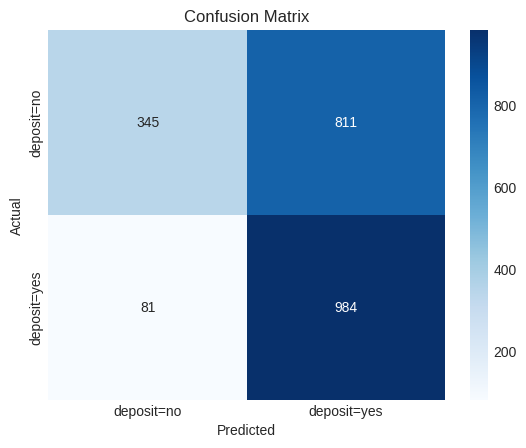

In [ ]:
conf_matrix_cba = confusion_matrix(y_true, y_pred)

# Vẽ ma trận nhầm lẫn bằng seaborn
sns.heatmap(conf_matrix_cba, annot=True, fmt='d', cmap='Blues', xticklabels=['deposit=no', 'deposit=yes'], yticklabels=['deposit=no', 'deposit=yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Mô hình cây quyết định (Decision Tree)

### Tiền xử lý dữ liệu

#### Chuyển dạng dữ liệu số

In [ ]:
# Áp dụng label encoding cho cột age_group (vì Label_encoding gán theo thứ tự tăng dần)
label_encoder = LabelEncoder()
df['age_encoded'] = label_encoder.fit_transform(df['age_bins'])+1
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)+1)))

{'18_27': 1, '28_44': 2, '45_64': 3, '65_84': 4, '85_100': 5}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Áp dụng label encoding cho cột campaign_bins (vì Label_encoding gán theo thứ tự tăng dần)
df['campaign_encoded'] = label_encoder.fit_transform(df['campaign_bins'])+1
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)+1)))

{'11_15': 1, '16_20': 2, '1_5': 3, '21_25': 4, '6_10': 5}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mapping_dict = {'debt': 0, 'low': 1, 'moderate': 2, 'high': 3, 'very_high': 4, 'extremely_high': 5}
df['balance_encoded'] = df['balance_bins'].map(mapping_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mapping_dict = {'under_15m': 1, '15_30m': 2, '30_45m': 3, '45_60m': 4}
df['duration_encoded'] = df['duration_bins'].map(mapping_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mapping_dict = {'no': 0, 'under_3_months': 1, '3_6months': 2, '6months_1year': 3, '1_2years': 4}
df['pdays_encoded'] = df['pdays_bins'].map(mapping_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mapping_dict = {'no': 0, '1_10': 1, '11_20': 2, '21_30': 3}
df['previous_encoded'] = df['previous_bins'].map(mapping_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Chuyển dạng dữ liệu phân loại

In [ ]:
# Thực hiện frequent encoding
mapping_dict = df['job'].value_counts().to_dict()
df['job_encoded'] = df['job'].map(mapping_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Thực hiện Label Encoding đối với cột marital, với single=0, divorced=1, married=2
mapping_dict = {'single': 1, 'divorced': 2, 'married': 3}
df['marital_encoded'] = df['marital'].map(mapping_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Thực hiện Label Encoding đối với cột education_encoded, với unknown=0, primary=1, secondary=2, tertiary=3
mapping_dict = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df['education_encoded'] = df['education'].map(mapping_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mapping_dict = {'no': 0, 'yes': 1}
df['default_encoded'] = df['default'].map(mapping_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mapping_dict = {'no': 0, 'yes': 1}
df['housing_encoded'] = df['housing'].map(mapping_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mapping_dict = {'no': 0, 'yes': 1}
df['loan_encoded'] = df['loan'].map(mapping_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mapping_dict = {'unknown': 0, 'telephone': 1, 'cellular': 2}
df['contact_encoded'] = df['contact'].map(mapping_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
mapping_dict = {'no': 0, 'yes': 1}
df['deposit_encoded'] = df['deposit'].map(mapping_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Áp dụng mô hình cây quyết định và đánh giá

In [ ]:
columns_tree = ['age_encoded', 'job_encoded', 'marital_encoded', 'education_encoded', 'default_encoded', 'balance_encoded', 'housing_encoded', 'loan_encoded', 'contact_encoded', 'duration_encoded', 'campaign_encoded', 'pdays_encoded', 'previous_encoded', 'deposit_encoded']
df_tree = df[columns_tree].reset_index(drop=True)
df_tree

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_encoded,job_encoded,marital_encoded,education_encoded,default_encoded,balance_encoded,housing_encoded,loan_encoded,contact_encoded,duration_encoded,campaign_encoded,pdays_encoded,previous_encoded,deposit_encoded
0,3,1331,3,2,0,2,1,0,0,2,3,0,0,1
1,3,1331,3,2,0,1,0,0,0,2,3,0,0,1
2,2,1813,3,2,0,1,1,0,0,2,3,0,0,1
3,3,918,3,2,0,2,1,0,0,1,3,0,0,1
4,3,1331,3,3,0,1,0,0,0,1,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11096,2,1935,1,1,0,1,1,0,2,1,3,0,0,0
11097,2,918,3,2,0,1,0,0,0,1,3,0,0,0
11098,2,1813,1,2,0,1,0,0,2,1,3,0,0,0
11099,2,1813,3,2,0,0,0,1,2,1,3,2,1,0


In [ ]:
## Các features:
X = df_tree.drop(['deposit_encoded'], axis = 1)

## Biến target: y_encoded
y = df_tree.deposit_encoded

print(pd.concat([X, y], axis = 1).head())

   age_encoded  job_encoded  marital_encoded  education_encoded  \
0            3         1331                3                  2   
1            3         1331                3                  2   
2            2         1813                3                  2   
3            3          918                3                  2   
4            3         1331                3                  3   

   default_encoded balance_encoded  housing_encoded  loan_encoded  \
0                0               2                1             0   
1                0               1                0             0   
2                0               1                1             0   
3                0               2                1             0   
4                0               1                0             0   

   contact_encoded duration_encoded  campaign_encoded pdays_encoded  \
0                0                2                 3             0   
1                0                2     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## Chia tập dữ liệu thành training, test sets theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
##------------------------------------------------------------------------------
## Xây dựng mô hình Decision Tree
##------------------------------------------------------------------------------
clf   = DecisionTreeClassifier()
model = clf.fit(X, y) # huấn luyện để tạo  mô hình

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## Kiểm thử mô hình
y_pred_tree = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## Hàm đánh giá (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
def classification_eval(y_test, y_pred):
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## Đánh giá mô hình bằng các chỉ số
scores = classification_eval(y_test, y_pred_tree)

## ROC và AUC: phân lớp NHỊ PHÂN
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)
auc = metrics.auc(fpr, tpr) ## nếu gọi trực tiếp auc(fpr, tpr) sẽ bị báo lỗi:  'numpy.float64' object is not callable

## Hiển thị giá trị cá chỉ số
print(f'accuray   = {(scores[0] * 100):.1f}%')
print(f'precision = {(scores[1] * 100):.1f}%')
print(f'recall    = {(scores[2] * 100):.1f}%')
print(f'f1        = {(scores[3] * 100):.1f}%')
print(f'AUC       = {(auc * 100):.1f}%')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


accuray   = 83.7%
precision = 87.0%
recall    = 77.5%
f1        = 82.0%
AUC       = 83.4%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


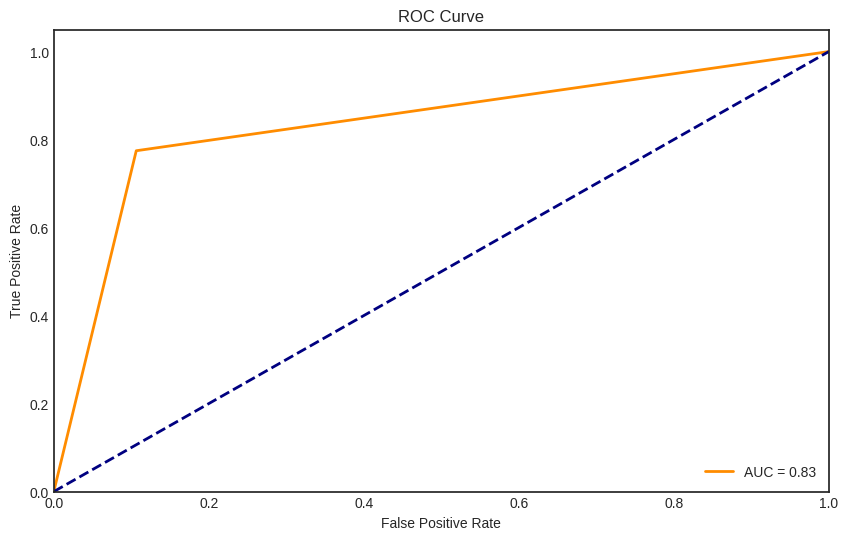

In [ ]:
# Vẽ đường ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
## Ma trận nhầm lẫn
print("* Purchased = 0 -->", y_test[y_test == 0].size, 'trường hợp')
print("* Purchased = 1 -->", y_test[y_test == 1].size, 'trường hợp')
print(confusion_matrix(y_test, y_pred_tree))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


* Purchased = 0 --> 1156 trường hợp
* Purchased = 1 --> 1065 trường hợp
[[1033  123]
 [ 240  825]]


In [ ]:
# Cross validation
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6466140566500764